In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/omarmendoza564/datos/main/datos/BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


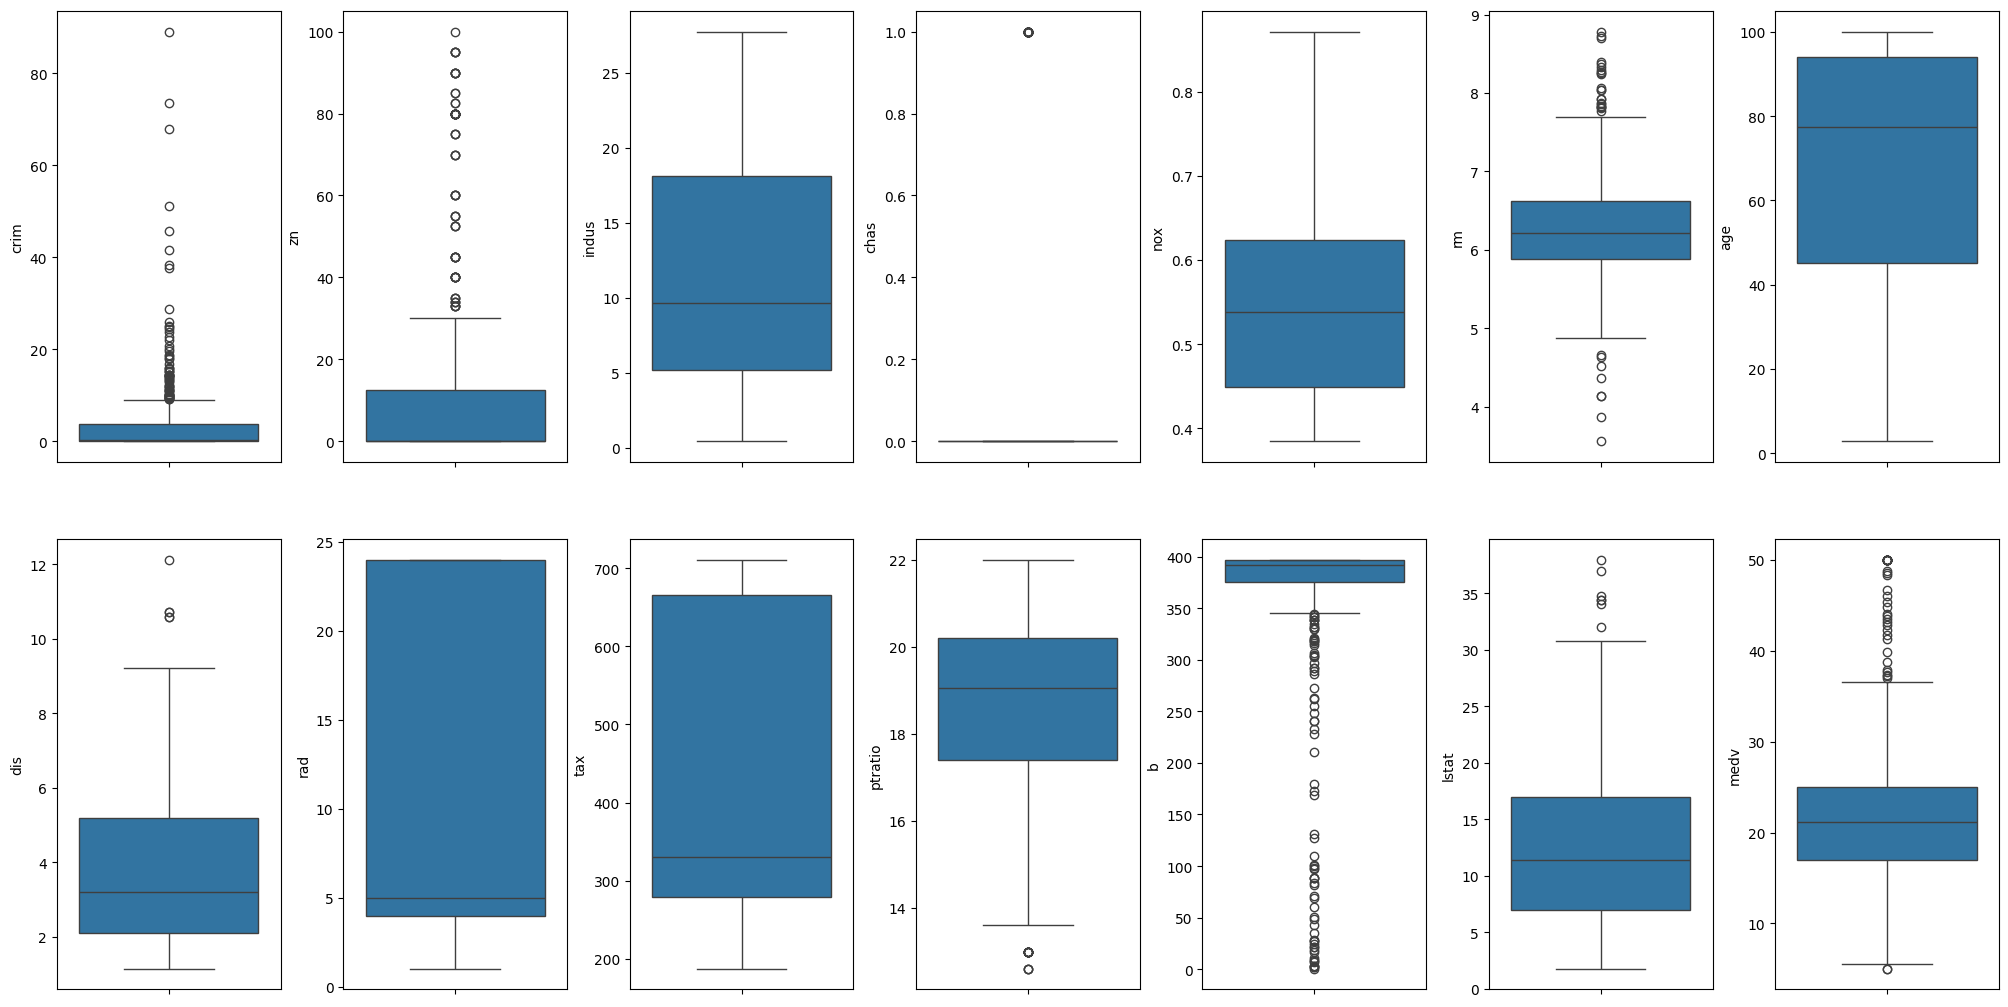

In [ ]:
fig, axs = plt.subplots(ncols = 7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index+= 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
#Correlacion lineal de RM y medv
cc,p= pearsonr(df["rm"], df["medv"])
print(f"Correlacion de rm y MEDV: {cc} con un valor p de {p}")
#Si la "p" es alta significa que es posible que sea casualidad y no una relacion real de los hechos
#Si la p es cercana a cero es muy probable que haya una relacion y no casualidad

Correlacion de rm y MEDV: 0.6953599470715394 con un valor p de 2.4872288710080976e-74


<Axes: >

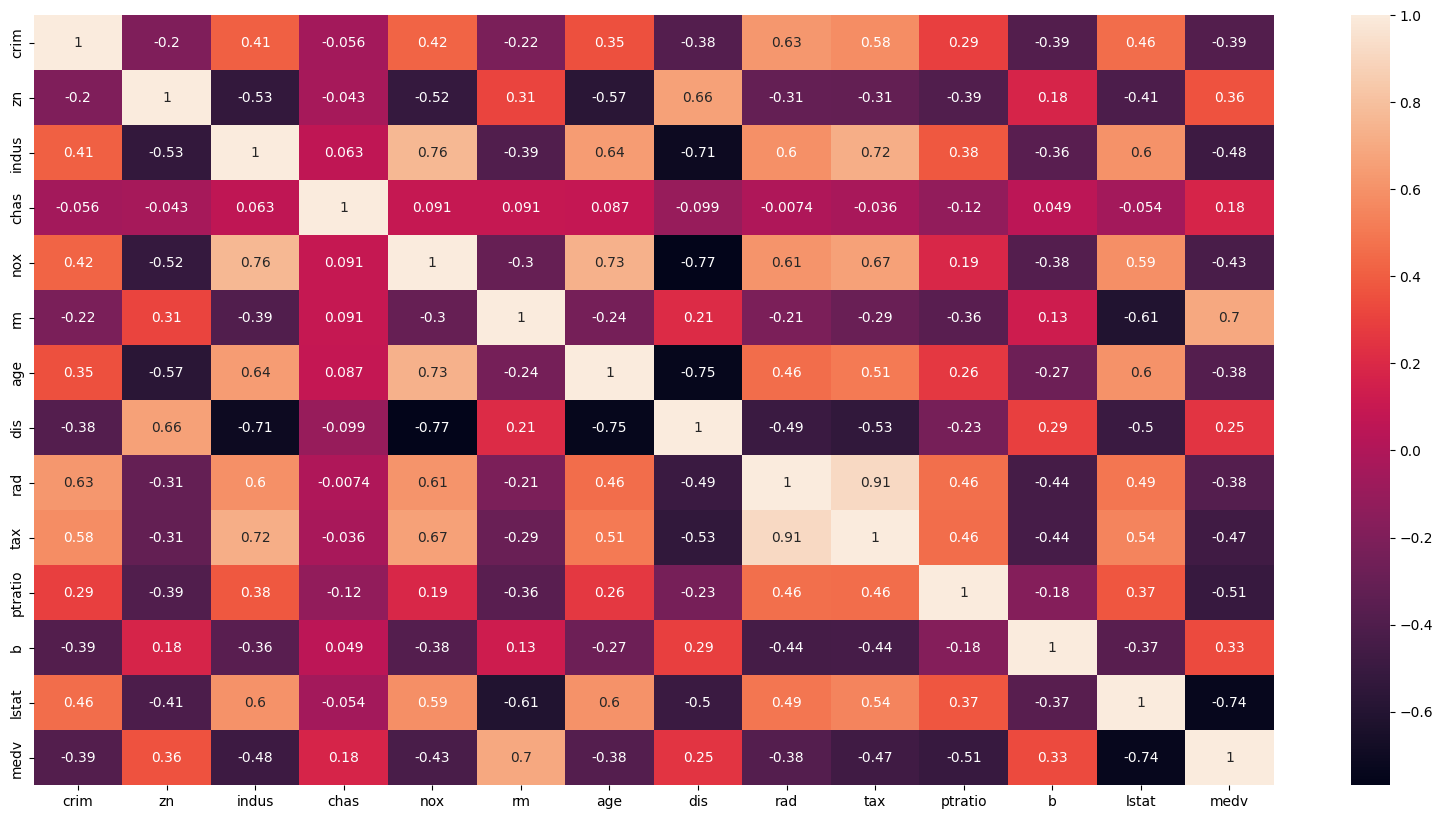

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

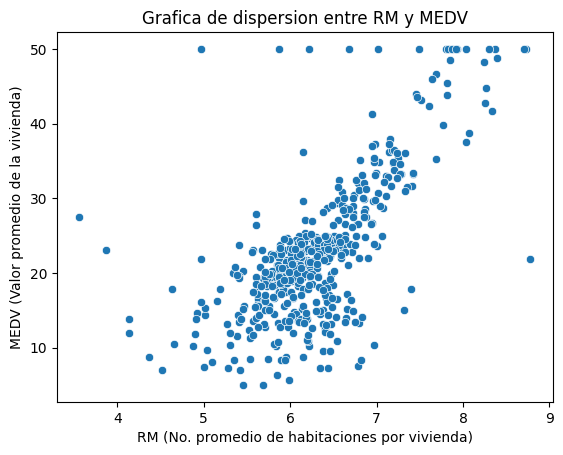

In [ ]:
sns.scatterplot(x=df["rm"], y =df["medv"])
plt.title("Grafica de dispersion entre RM y MEDV")
plt.xlabel("RM (No. promedio de habitaciones por vivienda)")
plt.ylabel("MEDV (Valor promedio de la vivienda)")
plt.show()

In [ ]:
X=df.drop("medv",axis=1)
Y=df["medv"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)#train_size=0.8 es lo mismo

In [ ]:
print(X_train.shape) #Siempre mas de entrenamiento que de prueba y manejar 80 de entrenamiento es bueno en general
print(X_test.shape)

(404, 13)
(102, 13)


In [ ]:
lr= LinearRegression()
lr.fit(X_train, Y_train)
lr

LinearRegression()

In [ ]:
Y_pred=lr.predict(X_test)
Y_pred

array([14.58508236, 24.68442434, 28.01302707, 28.01571753, 26.02162948,
       27.27282812, 28.87185622, 32.44055683, 24.84281035, 25.82815983,
        9.38388974, 16.97412059,  6.0797266 , 20.47332095, 30.62005531,
       15.4524758 , 19.96307521, 21.66428332, 21.92457607, 10.74564795,
       14.95194865, 27.79202374, 13.349843  , 18.88041698, 22.0710813 ,
       33.10817472, 19.86419657, 14.59118416, 20.46616183, 22.32881404,
       14.31507764, 31.24362319, 22.74357592, 26.21778311, 20.89770412,
        8.19147911, 17.7844868 , 35.52354203,  6.64397646, 20.25355905,
       32.47522425, 34.16981034, 18.85431837, 11.82731299, 24.56945036,
       15.53977286, 37.89451875, 27.4265253 , 24.13240623, 21.99429711,
       13.5563994 , 34.4715595 , 22.76702733, 17.11781828, 18.12203363,
       31.54333136,  8.54161297, 30.59144132, 18.89846429, 29.17949737,
       17.2317565 , 16.69019411, 25.43425452,  9.63692229, 22.39412285,
       33.67371793,  3.92437151, 25.38822586, 22.80028546,  4.42

In [ ]:
Y_test

,medv
149,15.4
252,29.6
4,36.2
240,22.0
82,24.8
...,...
297,20.3
353,30.1
223,30.1
45,19.3


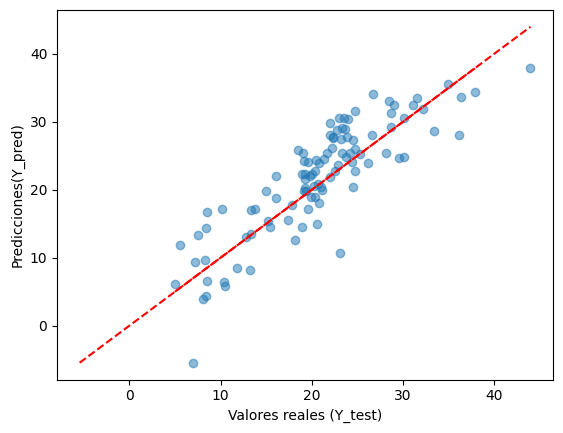

In [ ]:
plt.scatter(Y_test,Y_pred,alpha=0.5)
plt.xlabel("Valores reales (Y_test)")
plt.ylabel("Predicciones(Y_pred)")

#Linea de identidad

min_val=min(Y_test),min(Y_pred)
max_val=max(Y_test),max(Y_pred)
plt.plot([min_val, max_val],[min_val, max_val], color="red",linestyle="--")
plt.show()

In [ ]:
#MSE: Error cuadratico medio
#Magnitud de los errores
mse= mean_squared_error(Y_test,Y_pred)
print(f"MSE:{mse:2f}")

MSE:18.858573


In [ ]:
#RMSE
rmse=np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

RMSE: 4.34


In [ ]:
#MAE mean absolute error
mae= mean_absolute_error(Y_test, Y_pred)
print(f"MAE: {mae:.2f}")

MAE: 3.49




* MSE es más útil cuando se quiere castigar grandes errores más fuertemente, ya que eleva los errores
al cuadrado.
* RMSE es la versión interpretada del MSE, ya que está en la misma escala que los valores originales y te da una medida del error promedio de forma Intuitiva.
* MAE es más robusto ante los valores atípicos, ya que trata todos los errores de forma equitativa (sin elevarlos al cuadrado), lo que da una medida del error promedio sin sobrevalorar los errores grandes.


In [ ]:
#Detectar la multicolinealidad
#Factor de infalcion de varianza (VIF)
#Vif = 1 No hay corelacion entre la variable y las demas - multicolinealidad
#Vif entre 1 y 5 correlacion moderada
#VIF mayor a 5 alta correlacion, podria haber un problema de multicolinealidad

from  statsmodels.stats.outliers_influence import variance_inflation_factor

def calcular_vif(x):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = x.columns
    vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
    return vif_data

vif = calcular_vif(X_train)
vif

,Variable,VIF
0,crim,1.940678
1,zn,2.792200
2,indus,14.963299
3,chas,1.170632
4,nox,74.921447
5,rm,78.898306
6,age,22.125119
7,dis,14.146387
8,rad,15.711640
9,tax,63.727724


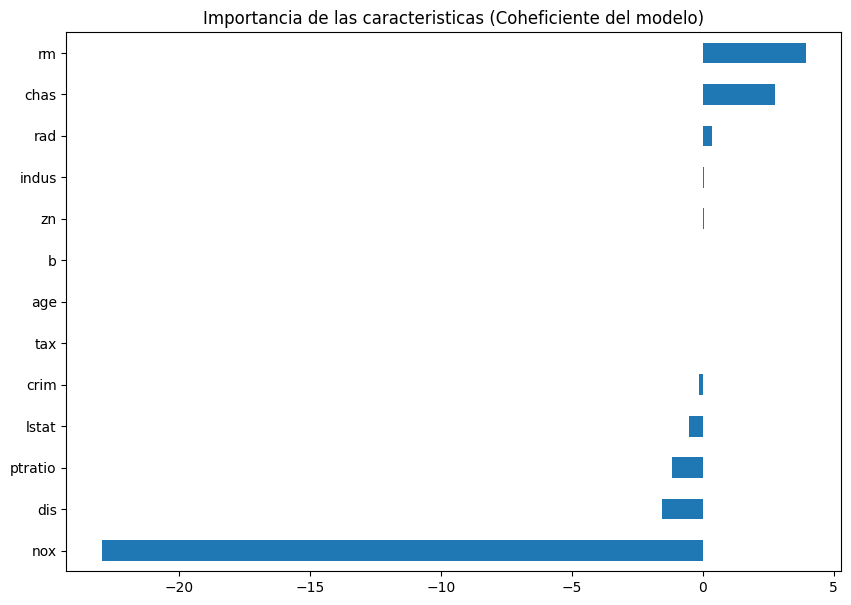

In [ ]:
#importancoa de las variables x
fi=pd.Series(lr.coef_,index=X_train.columns.values)
fi.sort_values().plot(kind="barh", figsize=(10,7))
plt.title("Importancia de las caracteristicas (Coheficiente del modelo)")
plt.show()

# Regularizacion de variables (Disminuye dimensionalidades)
regularizacion RIDGE - utiliza una penalizacion de coheficientes L2, penaliza grandes coheficientes y reduce su magnitud, adecuado cuando todas las caracteristicas influyen en el modelo.

In [ ]:
#Que tanto participa mi variable en mi modelo, en es te caso esta funcion afectara a las variables rm y nox de nuestro dataset
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=0.1) # 0 - 1 entre mas alto mayor regularizacion
ridge.fit(X_train, Y_train)

#Predicciones
Y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
print(f"MSE para Ridge: {mse_ridge}")

rmse_ridge = np.sqrt(mse_ridge)
print(f"RMSE para Ridge: {rmse_ridge}")

mae_ridge = mean_absolute_error(Y_test, Y_pred_ridge)
print(f"MAE para Ridge: {mae_ridge}")

Y_pred_ridge

MSE para Ridge: 18.574899445964743
RMSE para Ridge: 4.309860722339498
MAE para Ridge: 3.449547321387707


array([14.8885995 , 24.80694448, 28.07726877, 27.94082059, 26.01498433,
       27.36978369, 28.97329468, 32.37223218, 24.88099609, 25.75346936,
        9.33445067, 16.79658668,  6.09171495, 20.5467523 , 30.58266873,
       15.49437994, 20.13960563, 21.6369666 , 21.8973258 , 10.60572237,
       15.17456729, 27.6730726 , 13.31717892, 19.06568534, 22.0552837 ,
       33.12109499, 19.81656272, 14.60405622, 20.55696711, 22.30464372,
       14.38290268, 31.24271668, 22.78442486, 26.15506534, 21.08589768,
        8.21069486, 17.77868776, 35.42862554,  6.68428374, 20.22201549,
       32.45908149, 34.04966356, 18.93991516, 11.8431134 , 24.4337469 ,
       15.55720657, 37.85272438, 27.3801831 , 23.92779071, 21.85468275,
       13.55058087, 34.42463805, 22.77570764, 17.09451733, 18.29327586,
       31.46890348,  8.81692384, 30.48617492, 19.0227467 , 29.12191358,
       17.28449072, 16.70101431, 25.28253667,  9.59382871, 22.38256239,
       33.65348157,  3.74604887, 25.38946481, 22.8554555 ,  4.48

In [ ]:
#Que tanto participa mi variable en mi modelo, en es te caso esta funcion afectara a las variables rm y nox de nuestro dataset
from sklearn.linear_model import Ridge, Lasso
lasso = Lasso(alpha=0.9) # 0 - 1 entre mas alto mayor regularizacion
lasso.fit(X_train, Y_train)

#Predicciones
Y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
print(f"MSE para lasso: {mse_lasso}")

rmse_lasso = np.sqrt(mse_lasso)
print(f"RMSE para lasso: {rmse_ridge}")

mae_lasso = mean_absolute_error(Y_test, Y_pred_lasso)
print(f"MAE para lasso: {mae_lasso}")

Y_pred_ridge

MSE para lasso: 16.722533161063946
RMSE para lasso: 4.309860722339498
MAE para lasso: 3.265913975004553


array([14.8885995 , 24.80694448, 28.07726877, 27.94082059, 26.01498433,
       27.36978369, 28.97329468, 32.37223218, 24.88099609, 25.75346936,
        9.33445067, 16.79658668,  6.09171495, 20.5467523 , 30.58266873,
       15.49437994, 20.13960563, 21.6369666 , 21.8973258 , 10.60572237,
       15.17456729, 27.6730726 , 13.31717892, 19.06568534, 22.0552837 ,
       33.12109499, 19.81656272, 14.60405622, 20.55696711, 22.30464372,
       14.38290268, 31.24271668, 22.78442486, 26.15506534, 21.08589768,
        8.21069486, 17.77868776, 35.42862554,  6.68428374, 20.22201549,
       32.45908149, 34.04966356, 18.93991516, 11.8431134 , 24.4337469 ,
       15.55720657, 37.85272438, 27.3801831 , 23.92779071, 21.85468275,
       13.55058087, 34.42463805, 22.77570764, 17.09451733, 18.29327586,
       31.46890348,  8.81692384, 30.48617492, 19.0227467 , 29.12191358,
       17.28449072, 16.70101431, 25.28253667,  9.59382871, 22.38256239,
       33.65348157,  3.74604887, 25.38946481, 22.8554555 ,  4.48

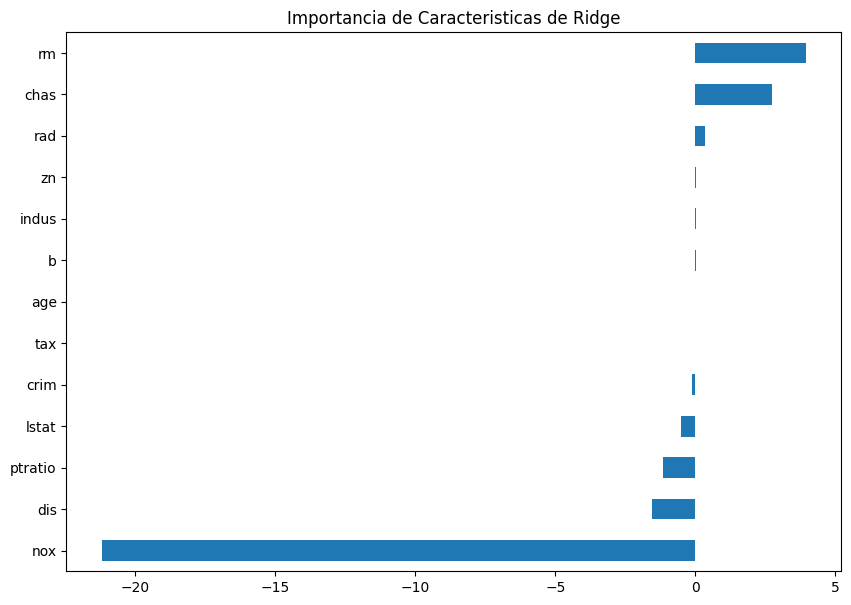

In [ ]:
#Grafico de la importancia de caracteristicas
fi_ridge = pd.Series(ridge.coef_, index=X_train.columns.values)
fi_ridge.sort_values().plot(kind="barh", figsize=(10,7))
plt.title("Importancia de Caracteristicas de Ridge")
plt.show()

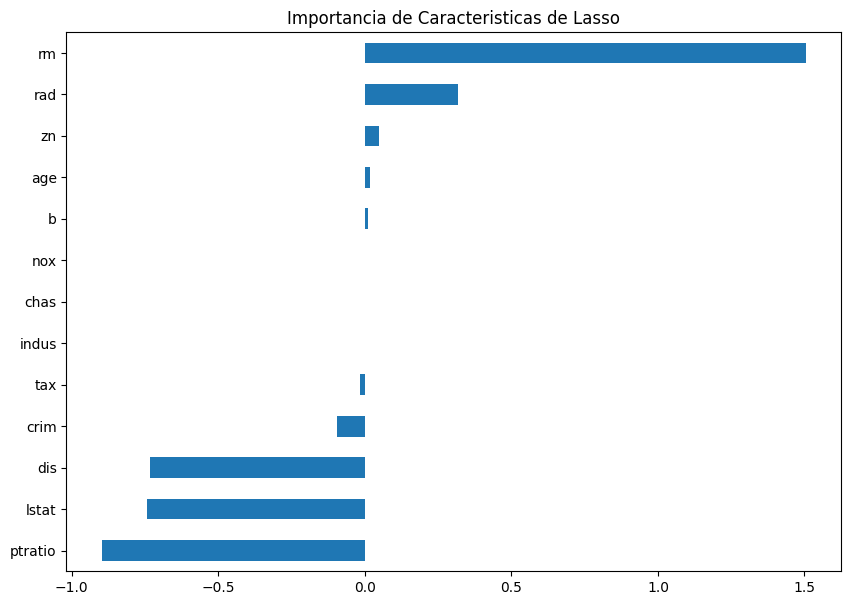

In [ ]:
#Grafico de la importancia de caracteristicas
fi_lasso = pd.Series(lasso.coef_, index=X_train.columns.values)
fi_lasso.sort_values().plot(kind="barh", figsize=(10,7))
plt.title("Importancia de Caracteristicas de Lasso")
plt.show()

In [ ]:
#Modelo de regresion eliminando variables poco significativas
X2 = df.drop(["medv","tax","ptratio","age","nox"], axis=1)
Y2 = df["medv"]
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, test_size=0.2, random_state=42)
X2_train

,crim,zn,indus,chas,rm,dis,rad,b,lstat
477,15.02340,0.0,18.10,0,5.304,2.1007,24,349.48,24.91
15,0.62739,0.0,8.14,0,5.834,4.4986,4,395.62,8.47
332,0.03466,35.0,6.06,0,6.031,6.6407,1,362.25,7.83
423,7.05042,0.0,18.10,0,6.103,2.0218,24,2.52,23.29
19,0.72580,0.0,8.14,0,5.727,3.7965,4,390.95,11.28
...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,5.836,2.2110,5,395.67,18.66
270,0.29916,20.0,6.96,0,5.856,4.4290,3,388.65,13.00
348,0.01501,80.0,2.01,0,6.635,8.3440,4,390.94,5.99
435,11.16040,0.0,18.10,0,6.629,2.1247,24,109.85,23.27


In [ ]:
#Crear y entrenar el modelo 2 de LinearRegression
lr2 = LinearRegression()
lr2.fit(X2_train, Y2_train)
lr2

LinearRegression()

In [ ]:
#Predecir los valores de MEDV para el modelo 2
Y_pred2 = lr2.predict(X2_test)
Y_pred2

array([27.81216243, 35.90415003, 18.28646677, 23.76636854, 19.65948715,
       22.21951238, 17.49170011, 16.85851399, 21.12022072, 22.27081057,
       22.07462007, 16.20210469, -7.28210116, 20.71409409, 19.59896976,
       25.93987887, 18.0975787 ,  4.94392166, 39.43199493, 18.46152265,
       26.80617236, 29.1405245 , 13.55293048, 27.5854675 , 18.7302418 ,
       14.06067008, 21.53998256, 15.69702793, 21.6639518 , 20.73733808,
       20.49318072, 26.05221904, 26.86998823, 19.45774818, 15.08886976,
       17.80871814, 31.19330766, 21.24354391, 23.05613393, 23.33505761,
       14.85712753, 32.08514058, 41.39456977, 16.96914943, 27.54116567,
       17.33444133, 16.45058655, 24.74622204, 18.94476017, 30.42922493,
       18.9943579 , 30.89206479, 18.6521438 , 29.52145975, 37.05317543,
       21.64977955, 20.19160772, 34.28934269, 24.67038558, 12.44465417,
       23.54528036, 31.81099749, 29.92806113, 18.17222444, 23.60265408,
       15.32566783, 21.13883672, 26.32961607, 32.07362942, 12.22

In [ ]:
#Predicciones
Y_pred2 = lr2.predict(X2_test)

mse_2= mean_squared_error(Y2_test, Y_pred2)
print(f"MSE para ler: {mse_2}")

rmse_2= np.sqrt(mse_2)
print(f"RMSE para lr2: {rmse_2}")

mae_2 = mean_absolute_error(Y2_test, Y_pred2)
print(f"MAE para lr2: {mae_2}")

Y_pred_ridge

MSE para ler: 28.692367077351406
RMSE para lr2: 5.356525653569803
MAE para lr2: 3.530259796043649


array([14.8885995 , 24.80694448, 28.07726877, 27.94082059, 26.01498433,
       27.36978369, 28.97329468, 32.37223218, 24.88099609, 25.75346936,
        9.33445067, 16.79658668,  6.09171495, 20.5467523 , 30.58266873,
       15.49437994, 20.13960563, 21.6369666 , 21.8973258 , 10.60572237,
       15.17456729, 27.6730726 , 13.31717892, 19.06568534, 22.0552837 ,
       33.12109499, 19.81656272, 14.60405622, 20.55696711, 22.30464372,
       14.38290268, 31.24271668, 22.78442486, 26.15506534, 21.08589768,
        8.21069486, 17.77868776, 35.42862554,  6.68428374, 20.22201549,
       32.45908149, 34.04966356, 18.93991516, 11.8431134 , 24.4337469 ,
       15.55720657, 37.85272438, 27.3801831 , 23.92779071, 21.85468275,
       13.55058087, 34.42463805, 22.77570764, 17.09451733, 18.29327586,
       31.46890348,  8.81692384, 30.48617492, 19.0227467 , 29.12191358,
       17.28449072, 16.70101431, 25.28253667,  9.59382871, 22.38256239,
       33.65348157,  3.74604887, 25.38946481, 22.8554555 ,  4.48

In [ ]:
! pip